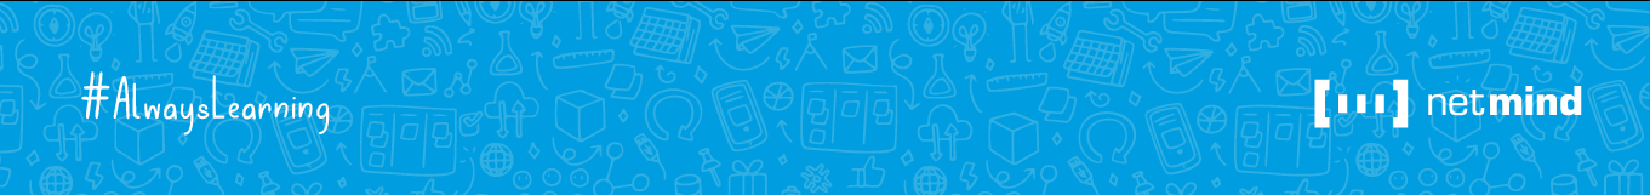
# **Exportar y desplegar un modelo Scikit-learn**

## **1. Formatos para Exportar Modelos Entrenados de Scikit-learn**

Una vez que hemos entrenado un modelo de machine learning utilizando Scikit-learn, es fundamental exportarlo en un formato adecuado para su uso posterior. 
- La exportación permite guardar el modelo entrenado en un archivo, lo que facilita su reutilización, despliegue en producción o compartición con otros equipos. 
- Scikit-learn ofrece varias opciones para exportar modelos, cada una con sus propias características y casos de uso.


### **Formatos Comunes para Exportar Modelos**

#### **a. Pickle (`.pkl`)**
`pickle` es una biblioteca estándar de Python que permite serializar objetos, incluidos modelos de Scikit-learn, en un archivo binario.

- **Ventajas:**
  - Fácil de usar y compatible con cualquier objeto de Python.
  - Ideal para proyectos internos o prototipos rápidos.
- **Desventajas:**
  - No es seguro para cargar modelos desde fuentes no confiables, ya que puede ejecutar código malicioso durante la deserialización.
  - Puede ser ineficiente para grandes modelos debido a su tamaño.
- **Ejemplo de uso:**
  ```python
  import pickle
  with open("model.pkl", "wb") as f:
      pickle.dump(model, f)
  ```

#### **b. Joblib (`.joblib`)**
`joblib` es una biblioteca optimizada para objetos grandes que contienen datos numéricos, como los modelos de Scikit-learn. Es especialmente útil para modelos que incluyen matrices NumPy.

- **Ventajas:**
  - Más eficiente que `pickle` para grandes modelos.
  - Soporta compresión, lo que reduce el tamaño del archivo.
- **Desventajas:**
  - Limitado a sistemas basados en Python.
- **Ejemplo de uso:**
  ```python
  import joblib
  joblib.dump(model, "model.joblib")
  ```

#### **c. ONNX (Open Neural Network Exchange)**
ONNX es un formato abierto diseñado para interoperabilidad entre diferentes frameworks de machine learning. Permite exportar modelos de Scikit-learn a un formato estándar que puede ser utilizado por otras herramientas o plataformas.

- **Ventajas:**
  - Compatible con múltiples frameworks (TensorFlow, PyTorch, etc.).
  - Ideal para integrar modelos en pipelines multi-framework.
- **Desventajas:**
  - Requiere conversión explícita usando herramientas como `skl2onnx`.
  - Algunas funcionalidades avanzadas de Scikit-learn pueden no ser compatibles.
- **Ejemplo de uso:**
  ```python
  from skl2onnx import convert_sklearn
  from skl2onnx.common.data_types import FloatTensorType

  initial_type = [('float_input', FloatTensorType([None, 4]))]
  onnx_model = convert_sklearn(model, initial_types=initial_type)

  with open("model.onnx", "wb") as f:
      f.write(onnx_model.SerializeToString())
  ```

#### **d. PMML (Predictive Model Markup Language)**
PMML es un estándar XML para representar modelos de machine learning. Es ampliamente utilizado en entornos empresariales para la interoperabilidad entre sistemas.

- **Ventajas:**
  - Compatible con herramientas de terceros y sistemas empresariales.
  - Facilita la interpretación y validación del modelo.
- **Desventajas:**
  - Complejo de implementar manualmente.
  - Requiere bibliotecas adicionales como `sklearn2pmml`.
- **Ejemplo de uso:**
  ```python
  from sklearn2pmml import sklearn2pmml
  from sklearn2pmml.pipeline import PMMLPipeline

  pipeline = PMMLPipeline([("classifier", model)])
  sklearn2pmml(pipeline, "model.pmml", with_repr=True)
  ```

### **Consideraciones al Elegir un Formato**
Al seleccionar un formato para exportar tu modelo, ten en cuenta los siguientes factores:
- **Interoperabilidad:** ¿El modelo será utilizado en un entorno específico o necesita ser compatible con múltiples frameworks?
- **Seguridad:** ¿El modelo será cargado desde fuentes externas o no confiables?
- **Rendimiento:** ¿El modelo es grande y requiere optimización en términos de tamaño y velocidad de carga?
- **Entorno de Despliegue:** ¿El modelo será utilizado en un sistema basado en Python o en una plataforma diferente?

## **2. APIs**

### **¿Qué es una API REST?**

- Una **API REST** (Representational State Transfer) es un tipo de arquitectura de software que define un conjunto de reglas y restricciones para crear servicios web. 
- Estos servicios permiten la comunicación entre sistemas informáticos a través de protocolos estándar, como **HTTP** (Hypertext Transfer Protocol). 
- REST no es un estándar formal, sino más bien un estilo arquitectónico basado en principios que facilitan la interoperabilidad entre diferentes sistemas.

- Las APIs REST son ampliamente utilizadas porque son simples, flexibles y escalables. 
- Permiten a los desarrolladores interactuar con recursos remotos (como bases de datos, aplicaciones o servicios) de manera eficiente y segura.

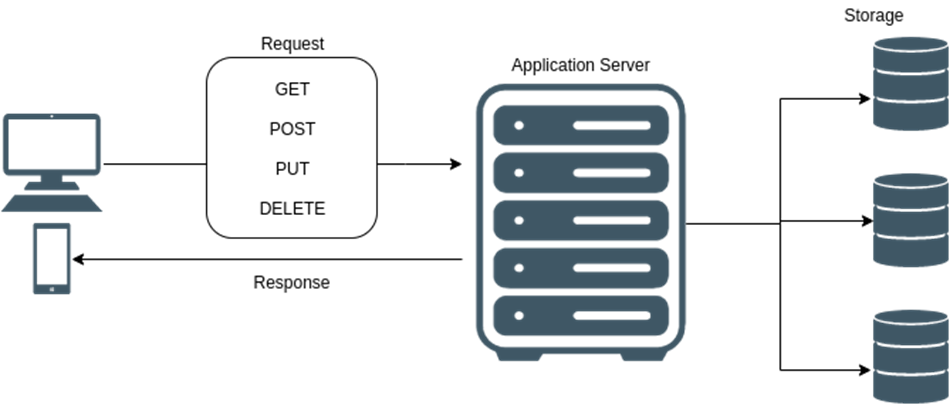

### **Principios REST**

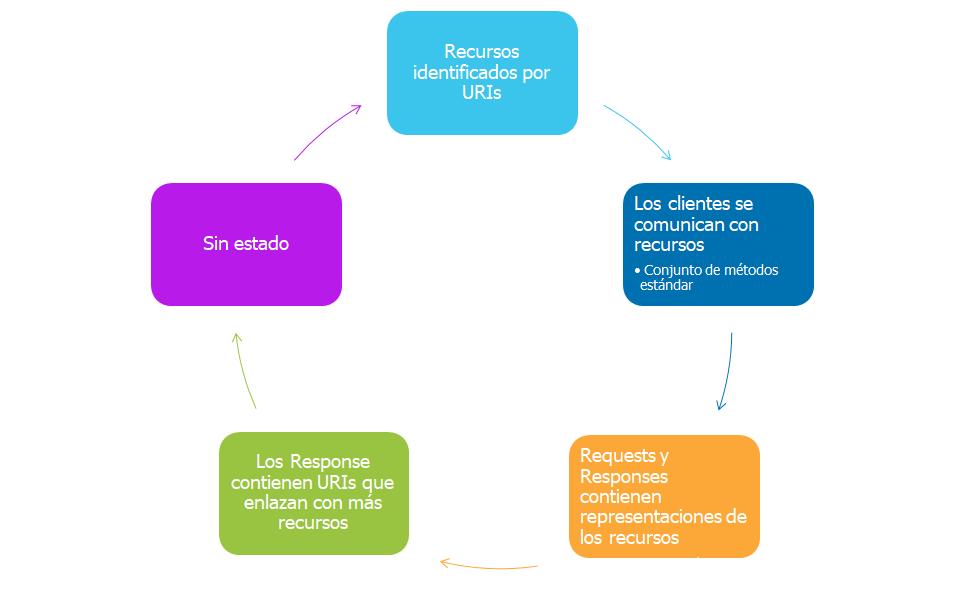

1. **Sin estado (Stateless):**
   - Cada solicitud HTTP contiene toda la información necesaria para procesarla, sin depender del estado del servidor. Esto significa que el servidor no almacena información sobre las solicitudes anteriores.
   - Ejemplo: Si un usuario realiza una solicitud para obtener sus datos personales, la solicitud incluirá su ID o token de autenticación, en lugar de depender de una sesión previa.

2. **Uso de recursos identificables:**
   - Los recursos (por ejemplo, usuarios, productos, pedidos) se identifican mediante URLs únicas. Cada recurso tiene un URI (Uniform Resource Identifier) que lo representa.
   - Ejemplo: `https://api.ejemplo.com/usuarios/1` representa al usuario con ID 1.

3. **Comunicación mediante métodos HTTP estándar:**
   - REST utiliza los métodos HTTP (`GET`, `POST`, `PUT`, `DELETE`, etc.) para realizar operaciones CRUD (Crear, Leer, Actualizar, Eliminar) sobre los recursos.
     - `GET`: Recuperar un recurso.
     - `POST`: Crear un nuevo recurso.
     - `PUT`: Actualizar un recurso existente.
     - `DELETE`: Eliminar un recurso.

4. **Formato de datos estandarizado:**
   - Las respuestas de una API REST suelen estar en formatos como **JSON** (JavaScript Object Notation) o **XML** (Extensible Markup Language), siendo JSON el más común debido a su simplicidad y compatibilidad con lenguajes modernos.

5. **Capacidad de caché:**
   - Las respuestas pueden ser almacenadas en caché por el cliente o intermediarios para mejorar el rendimiento y reducir la carga en el servidor.

6. **Interfaz uniforme:**
   - Todas las interacciones con la API siguen las mismas reglas y patrones, lo que facilita su uso y mantenimiento.

### **Usos comunes de una API REST**

1. **Integración de sistemas:**
   - Las APIs REST permiten que diferentes sistemas (como aplicaciones web, móviles o de escritorio) se comuniquen entre sí. Por ejemplo, una aplicación móvil puede usar una API REST para obtener datos de un servidor backend.

2. **Acceso a servicios en la nube:**
   - Muchos proveedores de servicios en la nube (como AWS, Google Cloud, Microsoft Azure) ofrecen APIs REST para acceder a sus servicios, como almacenamiento, procesamiento de datos o aprendizaje automático.

3. **Desarrollo de aplicaciones web y móviles:**
   - Las APIs REST son fundamentales para el desarrollo de aplicaciones modernas. Permiten separar la lógica del frontend (interfaz de usuario) de la lógica del backend (servidor y base de datos).

4. **Exposición de datos públicos:**
   - Empresas y organizaciones exponen datos públicos a través de APIs REST para que otros desarrolladores puedan utilizarlos. Por ejemplo:
     - APIs de redes sociales (Twitter, Facebook).
     - APIs de mapas (Google Maps, OpenStreetMap).
     - APIs financieras (precios de acciones, tasas de cambio).

5. **Automatización de procesos:**
   - Las APIs REST se utilizan para automatizar tareas repetitivas. Por ejemplo, una empresa puede usar una API para sincronizar datos entre diferentes plataformas o sistemas internos.

6. **Microservicios:**
   - En arquitecturas de microservicios, cada servicio expone una API REST para comunicarse con otros servicios de manera independiente.

7. **IoT (Internet de las cosas):**
   - Los dispositivos IoT suelen comunicarse con servidores centrales a través de APIs REST para enviar y recibir datos.

### **Ventajas de las APIs REST**

1. **Simplicidad:**
   - Basadas en protocolos estándares como HTTP, lo que facilita su implementación y uso.

2. **Escalabilidad:**
   - Al ser sin estado, los servidores pueden manejar un gran número de solicitudes simultáneas sin problemas.

3. **Flexibilidad:**
   - Soporta múltiples formatos de datos (JSON, XML, etc.) y es compatible con casi cualquier lenguaje de programación.

4. **Independencia de plataforma:**
   - Pueden ser consumidas por aplicaciones web, móviles, de escritorio o incluso dispositivos IoT.

5. **Seguridad:**
   - Se pueden implementar mecanismos de autenticación y autorización (como OAuth o tokens JWT) para proteger los datos.

### **Ejemplo práctico de una API REST**

Supongamos que tienes una API REST para gestionar una lista de usuarios:

- **Obtener todos los usuarios:**
  - **Solicitud:** `GET https://api.ejemplo.com/usuarios`
  - **Respuesta:** 
    ```json
    [
      {"id": 1, "nombre": "Juan", "edad": 30},
      {"id": 2, "nombre": "María", "edad": 25}
    ]
    ```

- **Obtener un usuario específico:**
  - **Solicitud:** `GET https://api.ejemplo.com/usuarios/1`
  - **Respuesta:** 
    ```json
    {"id": 1, "nombre": "Juan", "edad": 30}
    ```

- **Crear un nuevo usuario:**
  - **Solicitud:** `POST https://api.ejemplo.com/usuarios`
  - **Cuerpo de la solicitud:**
    ```json
    {"nombre": "Pedro", "edad": 28}
    ```
  - **Respuesta:** 
    ```json
    {"id": 3, "nombre": "Pedro", "edad": 28}
    ```

- **Actualizar un usuario:**
  - **Solicitud:** `PUT https://api.ejemplo.com/usuarios/1`
  - **Cuerpo de la solicitud:**
    ```json
    {"nombre": "Juan Pérez", "edad": 31}
    ```
  - **Respuesta:** 
    ```json
    {"id": 1, "nombre": "Juan Pérez", "edad": 31}
    ```

- **Eliminar un usuario:**
  - **Solicitud:** `DELETE https://api.ejemplo.com/usuarios/1`
  - **Respuesta:** 
    ```json
    {"mensaje": "Usuario eliminado correctamente"}
    ```

## **3. Flask**

- **Flask** es un microframework de desarrollo web en Python. 
- Es conocido por su simplicidad, flexibilidad y facilidad de uso, lo que lo convierte en una excelente opción para crear aplicaciones web pequeñas o APIs RESTful. 
- A diferencia de otros frameworks como Django, Flask no incluye características completas "out-of-the-box", pero permite a los desarrolladores agregar las herramientas que necesiten según el proyecto.

- Documentación oficial de Flask: [https://flask.palletsprojects.com/](https://flask.palletsprojects.com/)

#### **Características principales:**
1. **Ligero y minimalista:** Flask no impone una estructura rígida, lo que permite personalizar la aplicación según las necesidades.
2. **Flexible:** Soporta extensiones para añadir funcionalidades como autenticación, manejo de bases de datos, formularios, etc.
3. **Enrutamiento simple:** Permite definir rutas URL fácilmente usando decoradores.
4. **Soporte para plantillas:** Usa Jinja2 como motor de plantillas para renderizar páginas HTML dinámicas.
5. **Integración con Werkzeug:** Proporciona herramientas WSGI (Web Server Gateway Interface) para manejar solicitudes y respuestas HTTP.
6. **Compatible con APIs RESTful:** Ideal para construir servicios web basados en JSON.



### **Ejemplo básico de Flask**

```python
from flask import Flask, jsonify

# Crear una instancia de Flask
app = Flask(__name__)
# Definir una ruta básica
@app.route('/')
def home():
    return "¡Bienvenido a mi aplicación Flask!"
# Definir una ruta para una API RESTful
@app.route('/api/data', methods=['GET'])
def get_data():
    # Datos de ejemplo
    data = {
        "nombre": "Flask",
        "descripcion": "Un microframework de Python para desarrollo web",
        "version": "2.3.2"
    }
    # Devolver los datos en formato JSON
    return jsonify(data)
# Ejecutar la aplicación
if __name__ == '__main__':
    app.run(debug=True)
```

### **Ejecutar:**

1. Guarda el código en un archivo, por ejemplo, `app.py`.
2. Instala Flask si no lo tienes instalado:
   ```bash
   pip install flask
   ```
3. Ejecuta la aplicación:
   ```bash
   python app.py
   ```
4. Abre tu navegador y visita las siguientes URLs:
   - `http://127.0.0.1:5000/` para ver el mensaje de bienvenida.
   - `http://127.0.0.1:5000/api/data` para obtener los datos en formato JSON.


### **Consumir la API:**

1. Visitar `http://127.0.0.1:5000/`:
   ```
   ¡Bienvenido a mi aplicación Flask!
   ```

2. `http://127.0.0.1:5000/api/data`:
   ```json
   {
       "nombre": "Flask",
       "descripcion": "Un microframework de Python para desarrollo web",
       "version": "2.3.2"
   }
   ```

## **4. Proceso de Despliegue de una App Flask que Usa un Modelo de Scikit-learn**

El despliegue de una aplicación Flask que utiliza un modelo de Scikit-learn implica varios pasos clave, desde el entrenamiento del modelo hasta su integración en un entorno de producción.

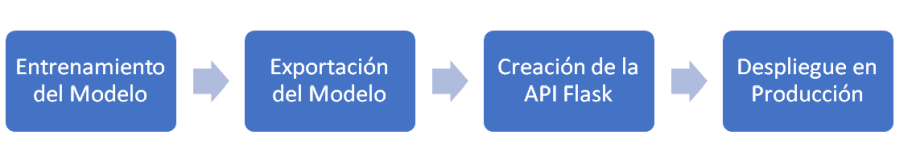

1. **Entrenamiento del Modelo:** Se entrena un modelo de Scikit-learn utilizando datos históricos.
2. **Exportación del Modelo:** El modelo entrenado se guarda en un archivo (por ejemplo, `.pkl` o `.joblib`) para su uso posterior.
3. **Creación de la API Flask:** Se desarrolla una API Flask que carga el modelo y proporciona endpoints para realizar predicciones.
4. **Despliegue en Producción:** La API Flask se despliega en un entorno de producción utilizando herramientas como `gunicorn`, Docker o servicios en la nube (Azure, AWS, etc.).

### **Entrenamiento del Modelo**
En esta etapa, se entrena un modelo de Scikit-learn utilizando un conjunto de datos. El modelo puede ser cualquier algoritmo compatible con Scikit-learn, como regresión logística, árboles de decisión, etc.

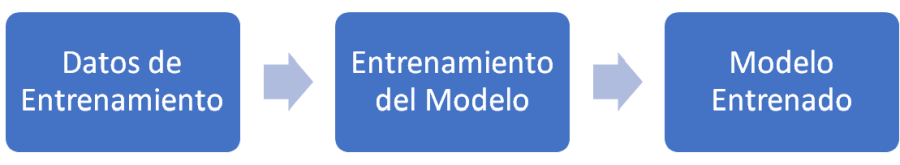

1. Preparar los datos de entrenamiento.
2. Dividir los datos en conjuntos de entrenamiento y prueba.
3. Entrenar el modelo utilizando los datos de entrenamiento.
4. Evaluar el modelo en los datos de prueba.

### **Exportación del Modelo**
Una vez entrenado, el modelo debe guardarse en un archivo para poder ser utilizado en la API Flask.

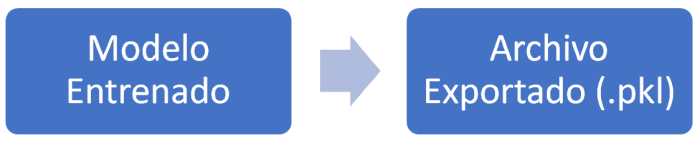

1. Usar `joblib` o `pickle` para guardar el modelo en un archivo binario.
   ```python
   import joblib
   joblib.dump(model, "model.pkl")
   ```
2. Verificar que el archivo exportado contiene el modelo entrenado.

### **Creación de la API Flask**
La API Flask es responsable de cargar el modelo exportado y proporcionar endpoints para realizar predicciones.

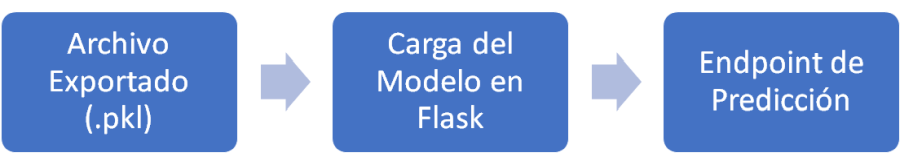

1. Crear un archivo `app.py` con la lógica de la API Flask.
2. Cargar el modelo exportado en la API.
   ```python
   import joblib
   model = joblib.load("model.pkl")
   ```
3. Definir un endpoint `/predict` que reciba datos de entrada y devuelva predicciones.
   ```python
   @app.route("/predict", methods=["POST"])
   def predict():
       data = request.json
       features = np.array(data["features"]).reshape(1, -1)
       prediction = model.predict(features)
       return jsonify({"prediction": int(prediction[0])})
   ```

### **Despliegue en Producción**
Finalmente, la API Flask se despliega en un entorno de producción para que pueda ser utilizada por aplicaciones o usuarios finales.

A. **Despliegue en un Servidor:**
   - Usar `gunicorn` para servir la API:
     ```bash
     gunicorn -w 4 app:app
     ```
   - O desplegar en plataformas en la nube como Azure, AWS o Heroku.

B. **Contenerización:** Crear un contenedor Docker para la API Flask.
   - Crear un archivo `Dockerfile`.
   - Construir la imagen Docker:
     ```bash
     docker build -t flask-api .
     ```
   - Ejecutar el contenedor:
     ```bash
     docker run -p 5000:5000 flask-api
     ```

**Pruebas:** Verificar que la API funciona correctamente enviando solicitudes HTTP.

## **5. Ejemplo**

### **Instalación de Dependencias**
Antes de comenzar, asegúrate de instalar las linrerías necesarias:
```bash
pip install scikit-learn flask joblib
```

### **Entrenamiento y Exportación del Modelo**

#### **Entrenar un Modelo de Scikit-learn**

Vamos a entrenar un modelo simple de clasificación utilizando el conjunto de datos Iris.

```python
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import joblib

# Cargar datos
X, y = load_iris(return_X_y=True)

# Entrenar modelo
model = LogisticRegression(max_iter=200)
model.fit(X, y)

# Guardar el modelo en un archivo usando joblib
joblib.dump(model, "model.joblib")
print("Modelo guardado como 'model.joblib'")
```

### **Crear una API Flask**

#### **Estructura del Proyecto**
Crea una estructura de proyecto:
```
proyecto/
│
├── model.pkl          # Modelo exportado
├── app.py             # Código de la API Flask
└── requirements.txt   # Dependencias
```

#### **Código de la API Flask (`app.py`)**
El siguiente código implementa una API Flask que carga el modelo y realiza predicciones.

```python
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Inicializar Flask
app = Flask(__name__)

# Cargar el modelo
model = joblib.load("model.pkl")

# Definir la ruta para realizar predicciones
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Obtener datos JSON de la solicitud
        data = request.json
        features = np.array(data["features"]).reshape(1, -1)  # Convertir a formato adecuado
        
        # Realizar la predicción
        prediction = model.predict(features)
        
        # Devolver la predicción como respuesta JSON
        return jsonify({"prediction": int(prediction[0])})
    except Exception as e:
        return jsonify({"error": str(e)}), 400

# Ruta de prueba
@app.route("/", methods=["GET"])
def home():
    return "API Flask funcionando correctamente"

if __name__ == "__main__":
    app.run(debug=True)
```

#### **Archivo `requirements.txt`**
Asegúrate de incluir las dependencias necesarias en un archivo `requirements.txt`:
```
Flask==2.3.2
scikit-learn==1.3.0
joblib==1.3.2
numpy==1.23.5
```

### **Ejecutar la API Flask**

#### **Instalar Dependencias**
Desde la terminal, instala las dependencias:
```bash
pip install -r requirements.txt
```

#### **Ejecutar la API**
Ejecuta la API Flask:
```bash
python app.py
```

La API estará disponible en `http://127.0.0.1:5000`.

### **Probar la API**

#### **Usar `curl` para Probar la API**
Puedes probar la API usando `curl`:
```bash
curl -X POST http://127.0.0.1:5000/predict \
-H "Content-Type: application/json" \
-d '{"features": [5.1, 3.5, 1.4, 0.2]}'
```

#### **Respuesta Esperada**
La API devolverá una respuesta JSON con la predicción:
```json
{
  "prediction": 0
}
```

#### **Usar Python para Probar la API**
También puedes probar la API desde Python:

```python
import requests

# URL de la API
url = "http://127.0.0.1:5000/predict"

# Datos de entrada
data = {"features": [5.1, 3.5, 1.4, 0.2]}

# Enviar solicitud POST
response = requests.post(url, json=data)

# Mostrar la respuesta
print(response.json())
```

## **Despliegue en Producción**

### **Usar un servidor para Servir la API**
Para desplegar la API en producción, usar `gunicorn`:
```bash
pip install gunicorn
gunicorn -w 4 app:app
```

### **Contenerizar la API con Docker**
Crea un archivo `Dockerfile` para contenerizar la API:
```dockerfile
# Base image
FROM python:3.9-slim

# Set working directory
WORKDIR /app

# Copy files
COPY . .

# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Expose port
EXPOSE 5000

# Run the app
CMD ["gunicorn", "-w", "4", "app:app"]
```

#### **Construye y ejecuta el contenedor:**
```bash
docker build -t flask-api .
docker run -p 5000:5000 flask-api
```

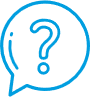
## **¿Preguntas?**